
# Kowshik P 

## ML Clustering assignment submitted on 02-May-2022
## -----------------------------------------------------------------------------
## Model Implemented - GaussianMixture and Random Forest
## Metric - Confusion Matrix (Accuracy_score)
## Accuracy Rate of Model : 0.96
## Type - 1 error: 2
## Type - 2 error: 1 
## Performance - Good
## -----------------------------------------------------------------------------


In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as mat;


In [2]:
dataset = pd.read_csv("Mall_Customers.csv");

dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
independent = dataset.iloc[:, [3, 4]].values;

#independent

In [4]:
from sklearn.mixture import GaussianMixture;

#from itertools import cycle;

#colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk");



#from sklearn.datasets import make_blobs;
#make_blobs(independent);

#import scipy.cluster.hierarchy as sch;

#sch.make_blobs(independent);

for values in range(1, 11):
    gaussianMixture = GaussianMixture(n_components = values, random_state = 42);
    gaussianMixture.fit(independent);

#mat.plot(range(1, 11), colors);
#mat.title("Estimated No.of Clusters");
#mat.show()





In [5]:
from sklearn.mixture import GaussianMixture;

gaussianMixture = GaussianMixture(n_components = values, random_state = 42);

y_gaussianMixture = gaussianMixture.fit_predict(independent);

y_gaussianMixture

array([4, 5, 2, 5, 4, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 4, 5, 4, 5, 4, 5,
       2, 5, 2, 5, 4, 5, 4, 5, 2, 5, 2, 5, 2, 5, 2, 5, 4, 5, 9, 5, 9, 9,
       4, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 6, 0, 0, 6, 6, 0, 6, 0, 0,
       0, 0, 0, 6, 0, 6, 6, 0, 0, 0, 6, 0, 6, 0, 0, 0, 0, 6, 0, 0, 6, 0,
       0, 0, 6, 0, 0, 0, 6, 0, 6, 0, 0, 6, 0, 7, 8, 7, 6, 7, 1, 7, 1, 7,
       6, 7, 1, 7, 1, 7, 1, 7, 1, 7, 6, 7, 1, 7, 6, 7, 1, 7, 1, 7, 1, 7,
       1, 7, 1, 7, 1, 7, 6, 7, 1, 7, 8, 7, 1, 7, 8, 7, 1, 7, 1, 3, 1, 3,
       1, 7, 8, 3, 8, 3, 8, 3, 8, 3, 8, 3, 8, 3, 8, 3, 8, 3, 8, 3, 8, 3,
       8, 3], dtype=int64)

In [6]:
supervised = pd.DataFrame(dataset);

supervised["Cluster_Group"] = y_gaussianMixture;

supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,2
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,8
197,198,Male,32,126,74,3
198,199,Male,32,137,18,8


In [7]:
supervised.to_csv("cluster_csv", index = False);

C:\Users\hp\Anaconda3\envs\virtualml\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


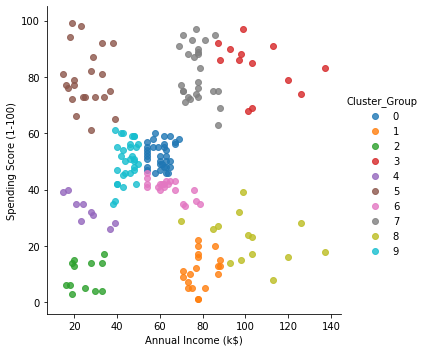

In [8]:
import seaborn as sns;

facet = sns.lmplot(data = supervised, x = supervised.columns[3], y = supervised.columns[4], hue = supervised.columns[5], 
          fit_reg = False, legend = True, legend_out = True);

In [9]:
dependent = supervised.iloc[:, [5]].values;

In [16]:
from sklearn.model_selection import train_test_split;

x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size = 1/3, random_state = 6);

In [17]:
from sklearn.preprocessing import StandardScaler;

standardization = StandardScaler();

x_train = standardization.fit_transform(x_train);

x_test = standardization.transform(x_test);


In [18]:
from sklearn.ensemble import RandomForestClassifier;

randomForestClassifier = RandomForestClassifier();

randomForestClassifier.fit(x_train, y_train);


C:\Users\hp\Anaconda3\envs\virtualml\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [19]:
y_pred = randomForestClassifier.predict(x_test);

In [20]:
from sklearn.metrics import confusion_matrix;

randamForestConfusionMatrix = confusion_matrix(y_test, y_pred);

print(randamForestConfusionMatrix);

[[13  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  1  0  0]
 [ 0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  1]
 [ 0  0  0  0  0  0  9  0  0  0]
 [ 1  0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 11]]


In [21]:
from sklearn.metrics import classification_report;

randamForestClassifierReport = classification_report(y_test, y_pred);

print(randamForestClassifierReport);

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         5
           5       1.00      0.83      0.91         6
           6       1.00      1.00      1.00         9
           7       0.86      0.86      0.86         7
           8       1.00      1.00      1.00         3
           9       0.92      1.00      0.96        11

    accuracy                           0.96        67
   macro avg       0.97      0.92      0.94        67
weighted avg       0.96      0.96      0.95        67



# Metric(Accuracy Score)
## The best performance is 1

In [22]:
from sklearn.metrics import accuracy_score;

RandomForestClassifierAccuracy = accuracy_score(y_test, y_pred);

print(RandomForestClassifierAccuracy)

0.9552238805970149
